<a href="https://colab.research.google.com/github/AditiCoderElite/HeartDiseasePrediction-using-CumulativeDistributionFunction/blob/main/Heart_Disease_Prediction_using_Cumulative_Distribution_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction using Cumulative Distribution Function


---

**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
chol_not_having_disease = df.loc[df['target'] == 0, 'chol']
chol_not_having_disease

165    286
166    229
167    268
168    254
169    203
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 138, dtype: int64

---

#### Calculating Probabilities Using $Z$-Score


In [4]:
def get_zscore(array):
    zscore = (array - np.mean(array)) / np.std(array)
    return zscore

chol_no_disease_zscores = get_zscore(chol_not_having_disease)
chol_no_disease_zscores

165    0.708533
166   -0.448238
167    0.343237
168    0.059118
169   -0.975887
         ...   
298   -0.204707
299    0.262060
300   -1.178830
301   -2.437072
302   -0.306178
Name: chol, Length: 138, dtype: float64

$Z$-scores allows us to calculate the probability of a continuous random variable or percentage of area under the standard normal distribution curve.

**Probability Density Function (PDF)**, i.e.,


$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

where,

- $\rho (x)$ read as **Rho**, is dependent on $x$ which is some arbitrary value of the random variable $X$.

- $\sigma$ is the standard deviation of the sample.

- $\mu$ is the mean value of the sample.

- $e = 2.71$ and $\pi = 3.14$



In [5]:
def prob_density_func(arr, mean, std):
  coeff = 1 / (std * np.sqrt(2 * np.pi))
  power_of_e = np.exp(- (arr - mean) ** 2 / (2 * std ** 2))
  prob = coeff * power_of_e
  return prob

If you rearrange the terms in the power of $e$, you will get an expression for $Z$-score

$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

$$\Rightarrow \rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}Z^2}$$

where $Z = \frac{x - \mu}{\sigma}$

To find the probability of a patient not suffering from heart disease and have a cholesterol value (denoted by random variable $X$) between 150 and 200, i.e., $150 \le X \le 200$, we need to calculate area under the curve enclosed between $X = 150$ and $X = 200$.

Let us first plot the individual probabilities of cholesterol values of patients not having heart disease and shade the area between $X = 150$ and $X = 200$ i.e. $P(150 \le X \le 200)$


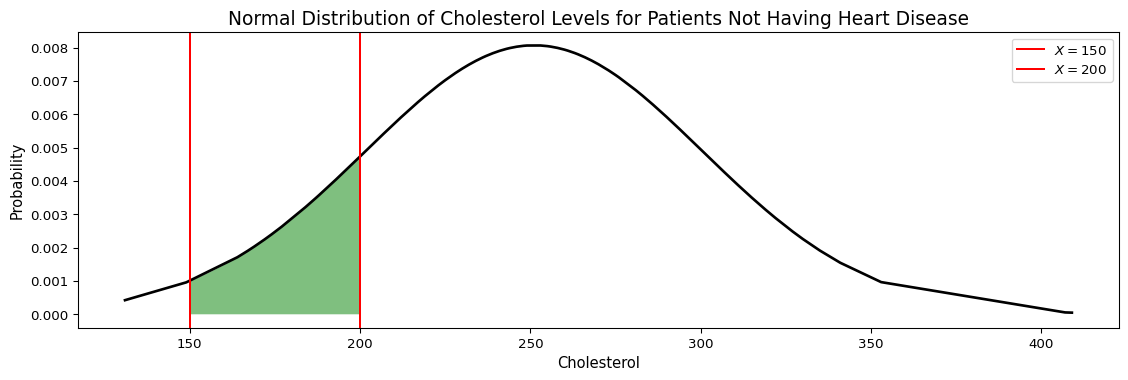

In [6]:
probs = prob_density_func(np.arange(150, 201), chol_not_having_disease.mean(), chol_not_having_disease.std())
rho = prob_density_func(chol_not_having_disease.sort_values(), chol_not_having_disease.mean(), chol_not_having_disease.std())

plt.figure(figsize = (14, 4), dpi = 96)
plt.xlabel('Cholesterol', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.title('Normal Distribution of Cholesterol Levels for Patients Not Having Heart Disease', fontsize = 14)
plt.plot(chol_not_having_disease.sort_values(),
         rho, color = 'black', linewidth = 2)
plt.fill_between(x = np.arange(150, 201), y1 = probs, facecolor = 'g', alpha = 0.5)
plt.axvline(x = 150, color = 'r', linestyle = '-', label = r"$X = 150$")
plt.axvline(x = 200, color = 'r', linestyle = '-', label = r"$X = 200$")
plt.legend()
plt.show()

---

#### Probability Calculation Using `cdf()` Function



In [7]:
zscore_200 = (200 - chol_not_having_disease.mean()) / chol_not_having_disease.std()
zscore_200

-1.0330068885126855

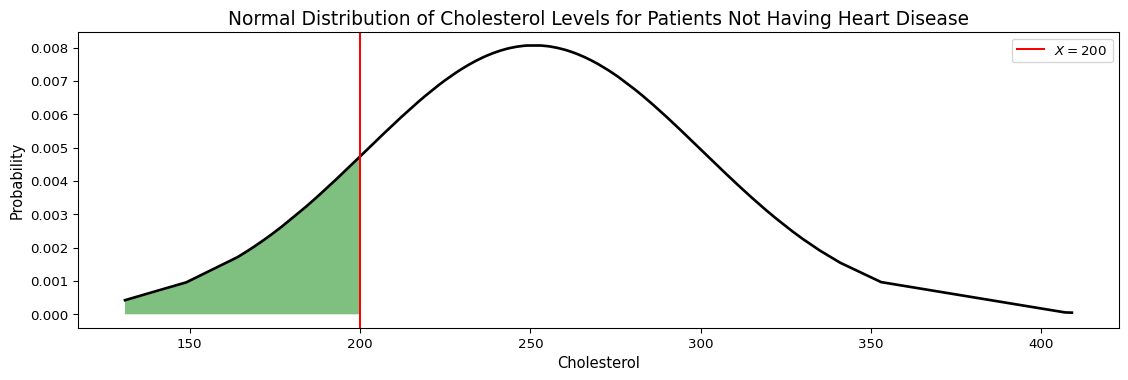

In [8]:
probs_200 = prob_density_func(np.arange(chol_not_having_disease.min(), 201), chol_not_having_disease.mean(), chol_not_having_disease.std())

plt.figure(figsize = (14, 4), dpi = 96)
plt.xlabel('Cholesterol', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.title('Normal Distribution of Cholesterol Levels for Patients Not Having Heart Disease', fontsize = 14)
plt.plot(chol_not_having_disease.sort_values(), rho, color = 'black', linewidth = 2)
plt.fill_between(x = np.arange(chol_not_having_disease.min(), 201), y1 = probs_200, facecolor = 'g', alpha = 0.5)
plt.axvline(x = 200, color = 'r', linestyle = '-', label = r"$X = 200$")
plt.legend()
plt.show()

In [9]:
from scipy.stats import norm

prob_less_than_200 = norm.cdf(zscore_200)
prob_less_than_200

0.15080033750158178


Thus, the probability of patients not having heart disease having cholesterol level less than 200 is 15.08% or you can say that approx 15% of the patients not having heart disease have the cholesterol level less than 200.


In [10]:
zscore_150 = (150 - chol_not_having_disease.mean()) / chol_not_having_disease.std()
zscore_150

-2.0440349070570165

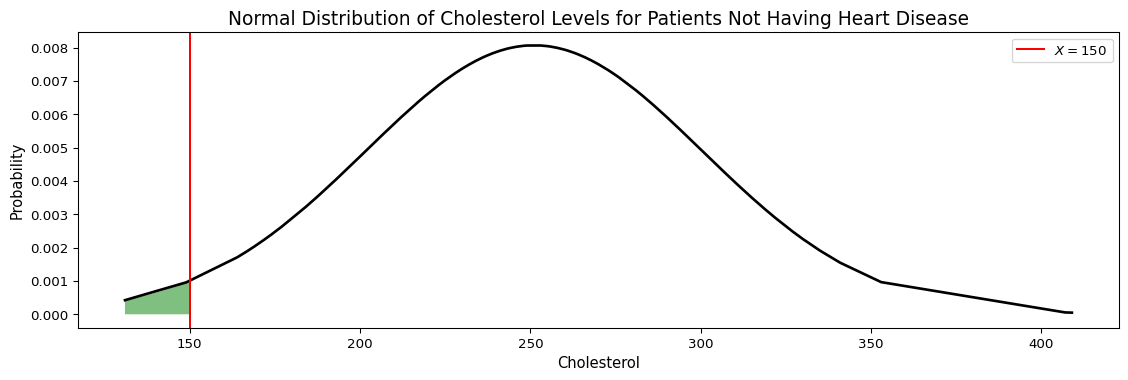

In [11]:
probs_150 = prob_density_func(np.arange(chol_not_having_disease.min(), 151), chol_not_having_disease.mean(), chol_not_having_disease.std())

plt.figure(figsize = (14, 4), dpi = 96)
plt.xlabel('Cholesterol', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.title('Normal Distribution of Cholesterol Levels for Patients Not Having Heart Disease', fontsize = 14)
plt.plot(chol_not_having_disease.sort_values(), rho, color = 'black', linewidth = 2)
plt.fill_between(x = np.arange(chol_not_having_disease.min(), 151), y1 = probs_150, facecolor = 'g', alpha = 0.5)
plt.axvline(x = 150, color = 'r', linestyle = '-', label = r"$X = 150$")
plt.legend()
plt.show()

In [12]:
prob_less_than_150 = norm.cdf(zscore_150)
prob_less_than_150

0.020475049402598002

Thus, the probability of patients not having heart disease having cholesterol level less than 150 is 2.047% or you could say that approx 2% of the patients not having heart disease have the cholesterol level less than 150.

So, the probability of patients not having heart disease and having cholesterol levels between 150 and 200 can be obtained by subtracting the probability of higher value (i.e. 200) from the lower value (i.e. 150).

 i.e. $$P(150 \le X \le 200)=P(-2.044 \le Z \le -1.033) = P(Z \le -1.033) - P(Z \le -2.044)$$

In [13]:
req_prob = prob_less_than_200 - prob_less_than_150
req_prob

0.13032528809898378

The probability of patients not having heart disease having cholesterol level between 150 and 200 is 13.032% or you could say that approx 13% patients not having heart disease have cholesterol level between 150 and 200.

---

#### Probability of Continuous Random Variable Above a $Z$-Score



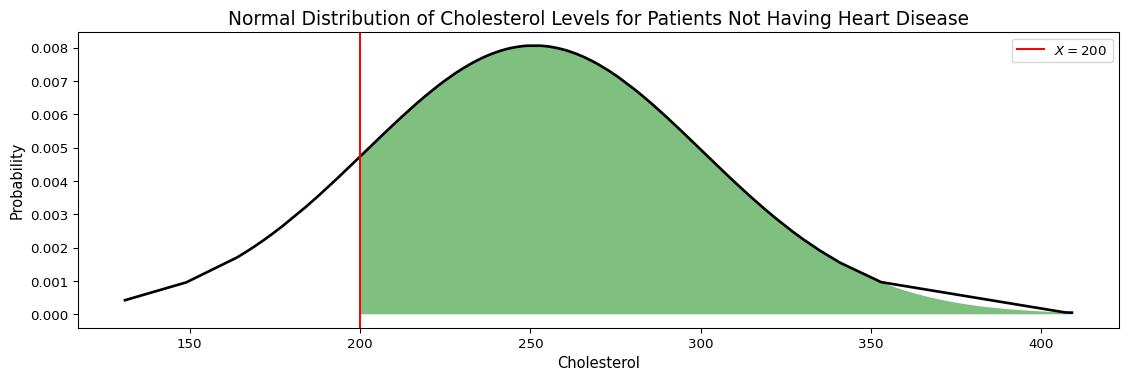

In [14]:
probs_above_200 = prob_density_func(np.arange(200, chol_not_having_disease.max() + 1),
                                    chol_not_having_disease.mean(),
                                    chol_not_having_disease.std())

plt.figure(figsize = (14, 4), dpi = 96)
plt.xlabel('Cholesterol', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.title('Normal Distribution of Cholesterol Levels for Patients Not Having Heart Disease', fontsize = 14)
plt.plot(chol_not_having_disease.sort_values(), rho, color = 'black', linewidth = 2)
plt.fill_between(x = np.arange(200, chol_not_having_disease.max() + 1), y1 = probs_above_200, facecolor = 'g', alpha = 0.5)
plt.axvline(x = 200, color = 'r', linestyle = '-', label = r"$X = 200$")
plt.legend()
plt.show()

In [15]:
prob_more_than_200 = 1 - prob_less_than_200
prob_more_than_200

0.8491996624984182

This means that nearly $85 \%$ of the patients not having heart disease have cholesterol value above 200.

---